<a href="https://colab.research.google.com/github/shaikh-7abish/Retrieval-Augmented-Generation-/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.7/298.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.2/32.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.5 MB/s eta

# Data Ingestion

In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader('speech.txt')
text_documents = loader.load()
text_documents[0]

Document(metadata={'source': 'speech.txt'}, page_content='In HackerRank, the "Greedy" section focuses on a specific approach to problem-solving called greedy algorithms.\n\nWhat are Greedy Algorithms?\nCore Idea: Greedy algorithms make the locally optimal choice at each step, hoping that these choices will lead to a globally optimal solution. In simpler terms, they always pick the option that seems best at the moment without considering future consequences.\nKey Characteristics:\n\nLocal Optimization: Greedy algorithms focus on making the best decision at each step, without looking ahead to see if it\'s part of the overall best solution.\nNo Backtracking: Once a decision is made, it\'s not usually revisited or changed.\nExample:\n\nImagine you\'re making change for a dollar. A greedy approach would be to give the customer the largest denomination coin possible at each step (e.g., first a quarter, then a quarter, then two dimes). This often works, but it\'s not always the most optimal s

In [ ]:
import os
from dotenv import load_dotenv

In [ ]:
load_dotenv()

False

In [ ]:
# web based loader
from langchain_community.document_loaders import WebBaseLoader
import bs4

In [ ]:
# load chunk and index the content fo the html page
loader = WebBaseLoader(web_path="https://lilianweng.github.io/posts/2023-06-23-agent/",
                       bs_kwargs = dict(parse_only=bs4.SoupStrainer(
                           class_=('post-title', 'post-content', 'post-header')
                       )))
text_documents = loader.load()

In [ ]:
text_documents[0]

Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("Tabish_DS_CV.pdf")
text_documents = loader.load()
text_documents

[Document(metadata={'source': 'Tabish_DS_CV.pdf', 'page': 0, 'page_label': '1'}, page_content='MD TABISH SHAIKH | CV  1 \n \n+91 9765965827      Linked.com/in/maybe7abish      tabishshaikh764@gmail.com \n \nMd Tabish Shaikh \nDATA SCIENTIST  \n \nObjective \n \nExperienced data scientist with a proven track record of delivering impactful data \nsolutions. Seeking a challenging role to utilize expertise in machine learning, deep \nlearning, and computer vision to solve complex problems. Proficient in Python,  SQL \nand various ML frameworks, with a strong focus on model development, deployment, \nand optimization. \n   \nEducation \n \n2021-2024 DBAT University \nB. Tech in Artificial Intelligence and Data Science \nDissertation: “Image Caption Generator” \nCGPA: 7.85 \n \n  2018-2021 MSBTE \nDiploma in CS Engineering \nThesis: “Car Price Prediction” \nCGPA: 8.9 \n   \nCertifications  Aug 2023 Google Data Analytics Professional Certificate \nInclude hands-on, practice-based assessments 

# Transform

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = text_splitter.split_documents(text_documents)
chunks[:2]

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refi

# Vector Embeddings and Vector Store

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma

In [ ]:
# Chroma Vector Data Base
db = Chroma.from_documents(chunks[:10],
                          HuggingFaceEmbeddings())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
query = 'What is the Component one'
result = db.similarity_search(query)

In [ ]:
result

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 2.  Examples of reasoning trajectories for knowledge-intensive tasks (e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env, WebShop). (Image source: Yao et al. 2023).\nIn both experiments on knowledge-intensive tasks and decision-making tasks, ReAct works better than the Act-only baseline where Thought: … step is removed.\nReflexion (Shinn & Labash 2023) is a framework to equip agents with dynamic memory and self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in which the reward model provides a simple binary reward and the action space follows the setup in ReAct where the task-specific action space is augmented with language to enable complex reasoning steps. After each action $a_t$, the agent computes a heuristic $h_t$ and optionally may decide to reset the environment to start a new trial depending on the self-reflection res

In [ ]:
result[0].page_content

'Fig. 2.  Examples of reasoning trajectories for knowledge-intensive tasks (e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env, WebShop). (Image source: Yao et al. 2023).\nIn both experiments on knowledge-intensive tasks and decision-making tasks, ReAct works better than the Act-only baseline where Thought: … step is removed.\nReflexion (Shinn & Labash 2023) is a framework to equip agents with dynamic memory and self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in which the reward model provides a simple binary reward and the action space follows the setup in ReAct where the task-specific action space is augmented with language to enable complex reasoning steps. After each action $a_t$, the agent computes a heuristic $h_t$ and optionally may decide to reset the environment to start a new trial depending on the self-reflection results.'

In [ ]:
# FAISS Vector data base
from langchain.vectorstores import FAISS
db1 = FAISS.from_documents(text_documents[:10],
                          HuggingFaceEmbeddings())

In [ ]:
result1 = db1.similarity_search(query)

In [ ]:
result1

[Document(id='f9becb04-0e64-4944-be89-c2f6775ae2de', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-refle

In [ ]:
result1[0].page_content

'\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nS

In [ ]:
# Lance Vector database
from langchain.vectorstores import LanceDB
db2 = LanceDB.from_documents(chunks[:10], HuggingFaceEmbeddings())

In [ ]:
result2 = db2.similarity_search(query)

In [ ]:
result2

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 2.  Examples of reasoning trajectories for knowledge-intensive tasks (e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env, WebShop). (Image source: Yao et al. 2023).\nIn both experiments on knowledge-intensive tasks and decision-making tasks, ReAct works better than the Act-only baseline where Thought: … step is removed.\nReflexion (Shinn & Labash 2023) is a framework to equip agents with dynamic memory and self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in which the reward model provides a simple binary reward and the action space follows the setup in ReAct where the task-specific action space is augmented with language to enable complex reasoning steps. After each action $a_t$, the agent computes a heuristic $h_t$ and optionally may decide to reset the environment to start a new trial depending on the self-reflection res

In [ ]:
result2[0].page_content

'Fig. 2.  Examples of reasoning trajectories for knowledge-intensive tasks (e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env, WebShop). (Image source: Yao et al. 2023).\nIn both experiments on knowledge-intensive tasks and decision-making tasks, ReAct works better than the Act-only baseline where Thought: … step is removed.\nReflexion (Shinn & Labash 2023) is a framework to equip agents with dynamic memory and self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in which the reward model provides a simple binary reward and the action space follows the setup in ReAct where the task-specific action space is augmented with language to enable complex reasoning steps. After each action $a_t$, the agent computes a heuristic $h_t$ and optionally may decide to reset the environment to start a new trial depending on the self-reflection results.'

## Installing Ollama to run llama model

In [ ]:
!pip install colab-xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
%load_ext colabxterm

In [ ]:
%xterm
# curl https://ollama.ai/install.sh | sh
# ollama serve & ollama pull llama3.2:1b

Launching Xterm...

<IPython.core.display.Javascript object>

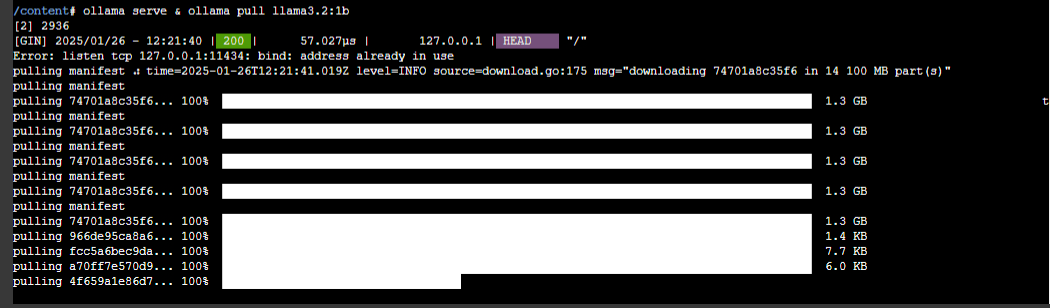

In [ ]:
!ollama list

NAME           ID              SIZE      MODIFIED       
llama3.2:1b    baf6a787fdff    1.3 GB    21 seconds ago    


# Retriever and Chain with Langchain

In [ ]:
from langchain_community.llms import Ollama
llm = Ollama(model = 'llama3.2:1b')
llm

<ipython-input-16-e9f48e0eadc7>:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model = 'llama3.2:1b')


Ollama(model='llama3.2:1b')

In [ ]:
# Design Chat Prompt Template
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided content.
Think step by step before providing a detailed answer.
I will tip you $1000 if the user finds the answer helpful.
<context>
{context}
""")